## **Task 1**
Distinguishing objects from each other and the background can be done via edge detection algorithms. Canny is the algorithm is efficient in highlighting the edges in wide ranges. It analizes the change in magnitude among pixel intensities to determine the existince of an edge.
The way in which canny can be implemented:

**Step 1:** Smoothing the image using Gaussian filter <br>
**Step 2:** Computing the derivative of the image after filtering it <br>
**Step 3:** Finding the magnitude and orientation of the gradient <br>
**Step 4:** Apply non-max suppression <br>
**Step 5:** Apply high and low thresholds (Hysteresis)

*Note that its more convinient to process the image in a gray scale (Single channel) than multi channels (RGB), to show it we will carry an experiment on both and analyze the performance*

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../images/fence.jpg')

# Task 1.1<br>
The following function utilizes a prebuild liberary in OpenCV to implement "Canny edge detection"

In [4]:

def canny_edge_detection(input_image, low_threshold, high_threshold, kernel_size, gray):
    # Convert the image to grayscale
    if (gray == 1):
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        img.shape

    # Applying GaussianBlur to help reducing noise and avoid false detection of edges
    blurred_image = cv2.GaussianBlur(input_image, kernel_size, 0)
    #plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))

    # Applying Canny edge detection
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)
    return edges

CPU times: user 24 ms, sys: 496 µs, total: 24.5 ms
Wall time: 11.5 ms
CPU times: user 40.9 ms, sys: 26.3 ms, total: 67.2 ms
Wall time: 28.8 ms


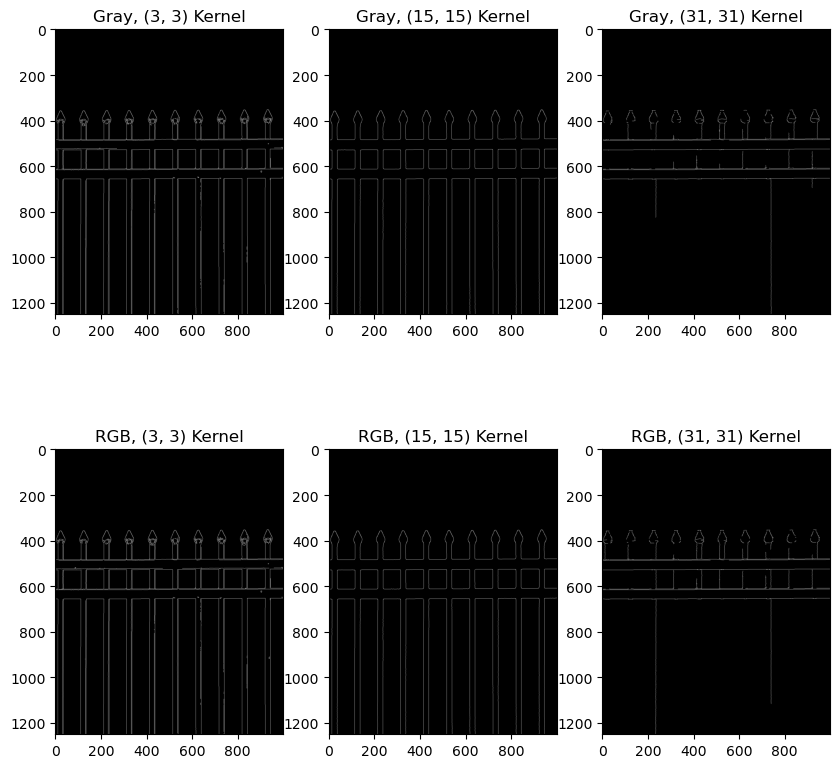

In [5]:
# Apply Canny edge detection (Gray)
edges_detected1 = canny_edge_detection(img, 50, 150, (3, 3), 1)
%time edges_detected2 = canny_edge_detection(img, 50, 150, (15, 15), 1)
edges_detected3 = canny_edge_detection(img, 50, 150, (31, 3), 1)

# Apply Canny edge detection (RGB)
edges_detected4 = canny_edge_detection(img, 50, 150, (3, 3), 0)
%time edges_detected5 = canny_edge_detection(img, 50, 150, (15, 15), 0)
edges_detected6 = canny_edge_detection(img, 50, 150, (31, 3), 0)


# Create a 2x2 grid for displaying images
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

# Displaying images
axs[0][0].imshow(cv2.cvtColor(edges_detected1, cv2.COLOR_BGR2RGB))
axs[0][0].set_title("Gray, (3, 3) Kernel")

axs[0][1].imshow(cv2.cvtColor(edges_detected2, cv2.COLOR_BGR2RGB))
axs[0][1].set_title("Gray, (15, 15) Kernel")

axs[0][2].imshow(cv2.cvtColor(edges_detected3, cv2.COLOR_BGR2RGB))
axs[0][2].set_title("Gray, (31, 31) Kernel")

axs[1][0].imshow(cv2.cvtColor(edges_detected4, cv2.COLOR_BGR2RGB))
axs[1][0].set_title("RGB, (3, 3) Kernel")

axs[1][1].imshow(cv2.cvtColor(edges_detected5, cv2.COLOR_BGR2RGB))
axs[1][1].set_title("RGB, (15, 15) Kernel")

axs[1][2].imshow(cv2.cvtColor(edges_detected6, cv2.COLOR_BGR2RGB))
axs[1][2].set_title("RGB, (31, 31) Kernel")


#plt.imshow(cv2.cvtColor(edges_detected, cv2.COLOR_BGR2RGB))

plt.show()

We have experemented different values for the Gaussian kernel size, the results evidently shows that 15 was the closest to the optimal option, since it allowed having clear highlights of the fence edges with the least noise. <br>
We are getting similar result by either processing the RGB or the Gray scaled image, hence we intend to pursue processing the image in gray scale. In addition, the processing time was less by half for the gray scaled image which ecourages use of it for Canny.

_______________________________________________________________________________________________________________________________________


**Our manual implememtation of canny edge detection:**

In [6]:
img = cv2.imread('../images/fence.jpg', cv2.IMREAD_GRAYSCALE)

img.shape

(1250, 1000)

**Step 1:** Smoothing the image using Gaussian filter

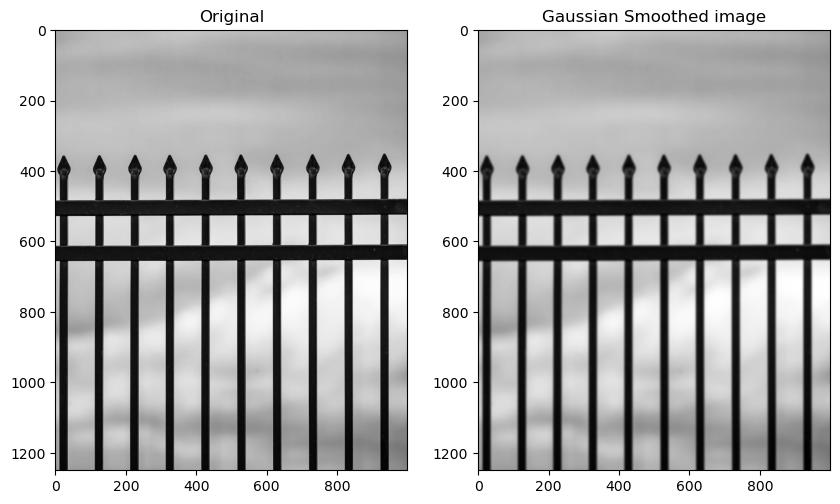

In [7]:
def gaussianSmooth(image_input):
    return cv2.GaussianBlur(image_input, (15,15), 0)


img_smoothed = gaussianSmooth(img)

# Plotting original and smoothed image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original")

axs[1].imshow(img_smoothed, cmap='gray')
axs[1].set_title("Gaussian Smoothed image")

plt.show()

**Step 2 & 3** Compute the derivative of the image after filtering it, then finding the magnitude and orientation of the gradients

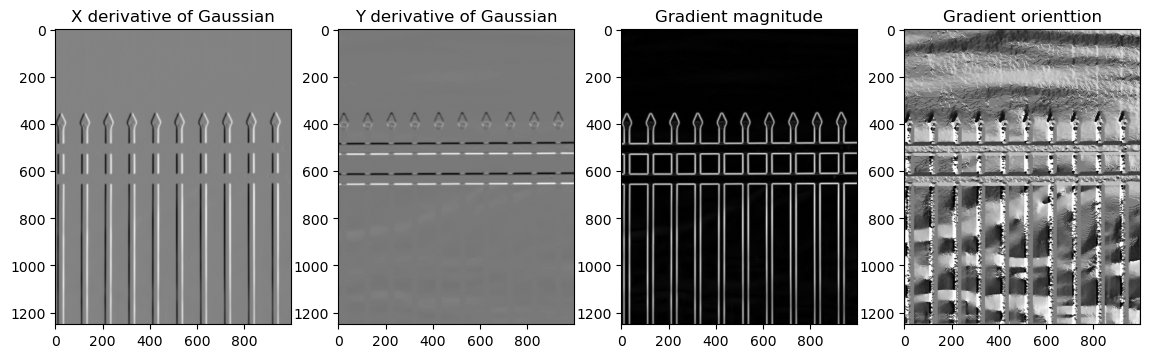

In [8]:
# Comuting the x derivative of the image
dx = cv2.Sobel(img_smoothed, cv2.CV_64F, 1, 0, ksize=3)

# computing the y derivatives
dy = cv2.Sobel(img_smoothed, cv2.CV_64F, 0, 1, ksize=3)

# computing the Gradient magnitude
magnitude = np.sqrt(dx**2 + dy**2)

# computing the Gradient orientation
orientation = np.arctan2(dy, dx) * 180 / np.pi


fig, axs = plt.subplots(1, 4, figsize=(14, 14))
axs[0].imshow(dx, cmap='gray')
axs[0].set_title("X derivative of Gaussian")

axs[1].imshow(dy, cmap='gray')
axs[1].set_title("Y derivative of Gaussian")

axs[2].imshow(magnitude, cmap='gray')
axs[2].set_title("Gradient magnitude")

axs[3].imshow(orientation, cmap='gray')
axs[3].set_title("Gradient orienttion")

plt.show()

As is evident from the figure above that the x derivative computation highlighted the vertical edges in the image, due to the fact that it calculates the difference between pixel intensities while sweeping it horizontally.
Similarly in the y derivative, the computation shows the horizontal edges as the calculation of pixels is conducted vertically. <br>
The third image shows the summation of edges (Gradient magnitude), this is done by finding the Pythagorean of both derivatives **sqrt(dx^2 + dy^2)**, thus representing the overall change in pixel intensity in all directions. <br>
**θ=arctan2(dx, dy)** is the formula in which we used to calculate the Gradient Orientation, this along with the magnitude shall help with applying the Non-maximum suppression in step 3 to keep the edges with a major change in intensity in a specific direction (fine the edges). 

**Step 4:** Applying the Non-maximum suppression

In [9]:
def non_maximum_suppression(gradient_magnitude, gradient_orientation):
    height, width = gradient_magnitude.shape

    print(height, width)

    output = np.zeros((height, width))

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            orientation = gradient_orientation[i, j]

            # Determining the neighboring pixels for comparison based on orientation
            if (0 <= orientation < np.pi/8) or (7*np.pi/8 <= orientation <= np.pi):
                neighbors = [gradient_magnitude[i, j-1], gradient_magnitude[i, j+1]]

            elif np.pi/8 <= orientation < 3*np.pi/8:
                neighbors = [gradient_magnitude[i-1, j+1], gradient_magnitude[i+1, j-1]]

            elif 3*np.pi/8 <= orientation < 5*np.pi/8:
                neighbors = [gradient_magnitude[i-1, j], gradient_magnitude[i+1, j]]
                
            else:
                neighbors = [gradient_magnitude[i-1, j-1], gradient_magnitude[i+1, j+1]]

            # Eliminate non-maximum
            if gradient_magnitude[i, j] >= max(neighbors):
                output[i, j] = gradient_magnitude[i, j]

    return output

1250 1000


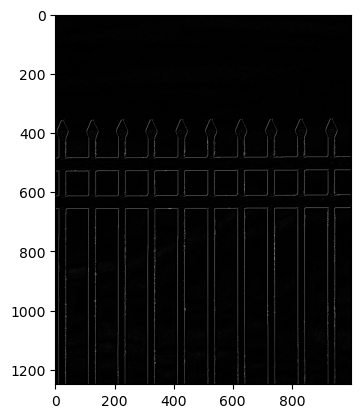

In [10]:
non_maximum = non_maximum_suppression(magnitude, orientation)
plt.imshow(non_maximum, cmap='gray')
plt.show()

**Step 5:** Applying high and low thresholds (Hysteresis)

In [11]:
def thresholding(non_max, low_threshold, high_threshold):
    height, width = len(non_max), len(non_max[0])

    # Initialize arrays with 0 values
    strong_edges = [[0 for _ in range(width)] for _ in range(height)]
    weak_edges = [[0 for _ in range(width)] for _ in range(height)]
    
    # replace the 0's with 255's whenever a strong edge (greater than or equal to high threshold)) is detected
    for i in range(height):
        for j in range(width):
            
            # marking strong edges
            if non_max[i][j] >= high_threshold:
                strong_edges[i][j] = 255 
            
            # marking weak edges
            elif non_max[i][j] >= low_threshold:
                weak_edges[i][j] = 255
                
    return strong_edges, weak_edges

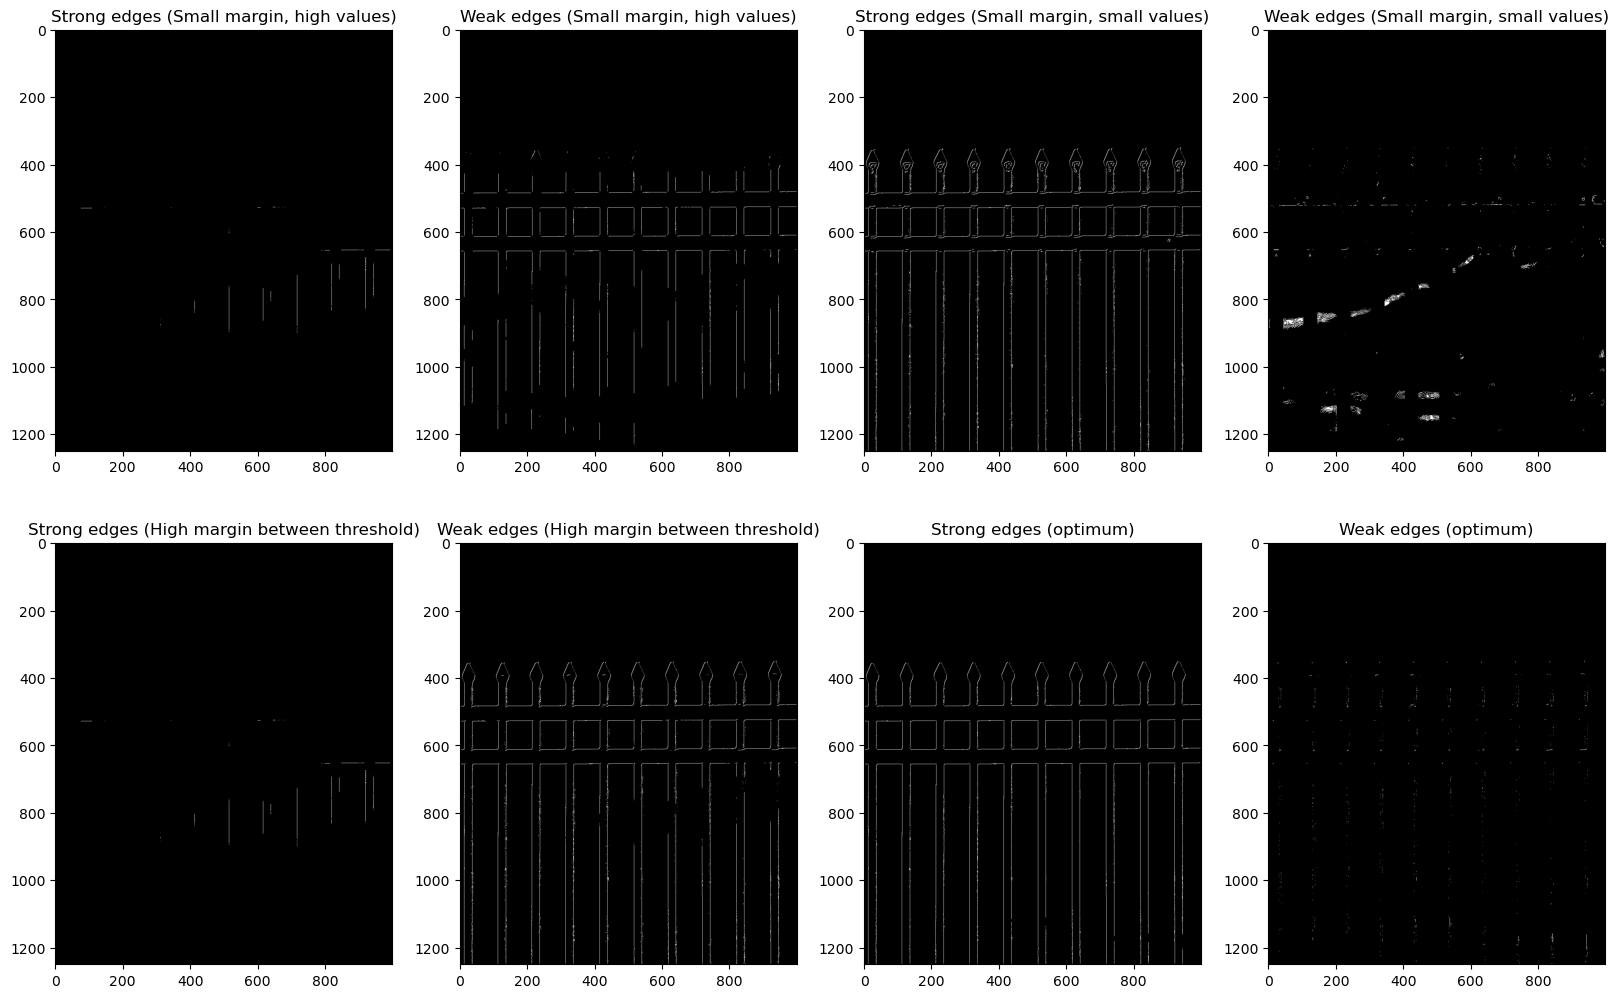

In [12]:
low_threshold1 = 200
high_threshold1 = 250

low_threshold2 = 10
high_threshold2 = 20

low_threshold3 = 50
high_threshold3 = 250

low_threshold4 = 50
high_threshold4 = 150

strong_edges1, weak_edges1 = thresholding(non_maximum, low_threshold1, high_threshold1)
strong_edges2, weak_edges2 = thresholding(non_maximum, low_threshold2, high_threshold2)
strong_edges3, weak_edges3 = thresholding(non_maximum, low_threshold3, high_threshold3)
strong_edges4, weak_edges4 = thresholding(non_maximum, low_threshold4, high_threshold4)


ig, axs = plt.subplots(2, 4, figsize=(20, 20))
axs[0][0].imshow(strong_edges1, cmap='gray')
axs[0][0].set_title("Strong edges (Small margin, high values)")

axs[0][1].imshow(weak_edges1, cmap='gray')
axs[0][1].set_title("Weak edges (Small margin, high values)")

axs[0][2].imshow(strong_edges2, cmap='gray')
axs[0][2].set_title("Strong edges (Small margin, small values)")

axs[0][3].imshow(weak_edges2, cmap='gray')
axs[0][3].set_title("Weak edges (Small margin, small values)")

axs[1][0].imshow(strong_edges3, cmap='gray')
axs[1][0].set_title("Strong edges (High margin between threshold)")

axs[1][1].imshow(weak_edges3, cmap='gray')
axs[1][1].set_title("Weak edges (High margin between threshold)")

axs[1][2].imshow(strong_edges4, cmap='gray')
axs[1][2].set_title("Strong edges (optimum)")

axs[1][3].imshow(weak_edges4, cmap='gray')
axs[1][3].set_title("Weak edges (optimum)")

plt.subplots_adjust(hspace=-0.5) 
plt.show()

Trials showed neither big nor small margin shall be between the low and high threshold, since small difference between the values (when both thresholds are high in value) causes eliminating important major edges and failure in detecting continues ones. In case both thresholds are small in value, more edges with noise appears, which indicates that it becomes harder for the algorithm to differentiate between weak and strong edge. <br>
In case of high margin between the two thresholds, most of edges would be considered as weak edges which will result in important ones to be dispensed.

While we are suppressing weak edges (below low threshold), the ones between low and high threshold are also considered weak, yet their connection to a strong edge implies keeping them. The following process shows weak edges that are connected to strong ones. Also their combination with strong edges in one image.

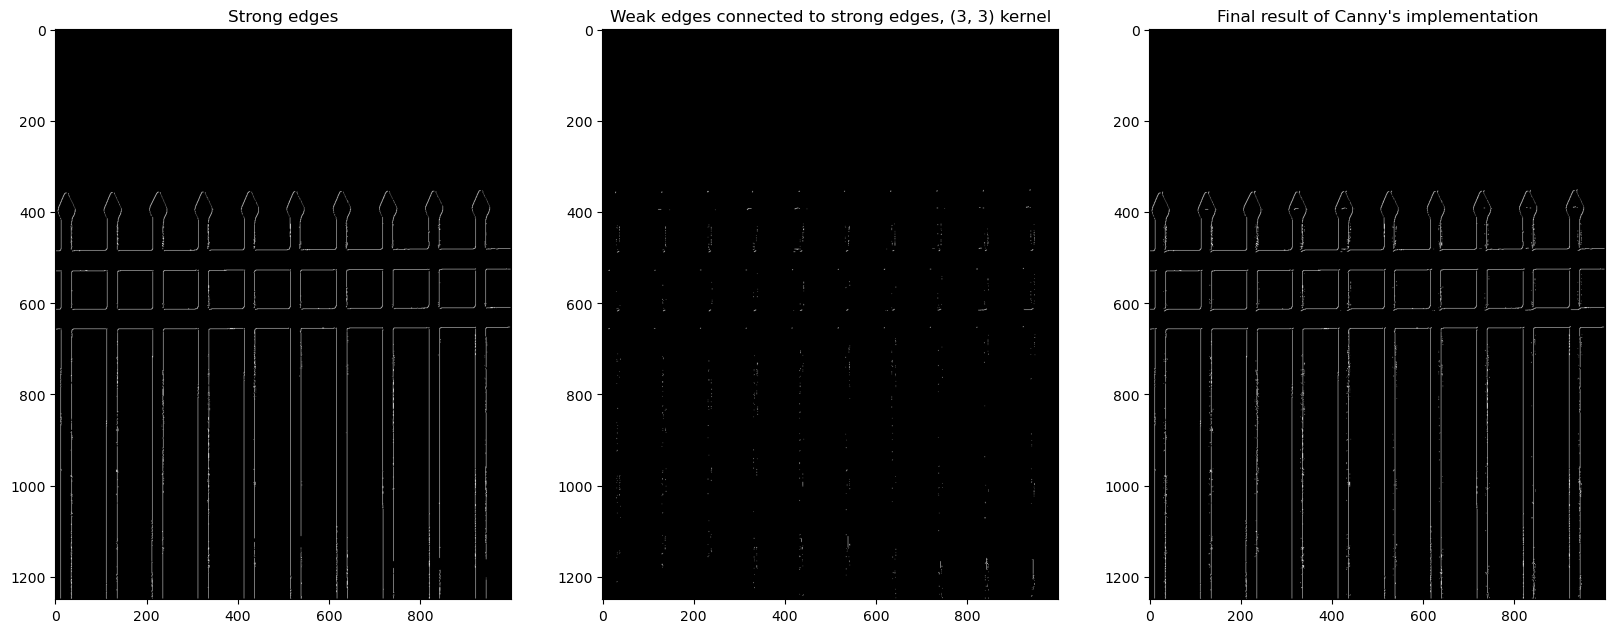

In [13]:
strong = 255

def surrounded_by_strong(y, x, strong_edges):
    # Define the 8 neighboring positions
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for dy, dx in neighbors:
        new_y, new_x = y + dy, x + dx
        
        # Check if the position is within bounds of the image
        if 0 <= new_y < 1250 and 0 <= new_x < 1000:
            if strong_edges[new_y][new_x] != strong:
                return False

    return True


for rows in range (0,1250):
    for coloumns in range (0, 1000):

        if (surrounded_by_strong(rows, coloumns, strong_edges4) == False):
            weak_edges4[0][0] = 0
            #print("1")



canny = np.add(strong_edges4, weak_edges4)
# plotting the results
ig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs[0].imshow(strong_edges4, cmap='gray')
axs[0].set_title("Strong edges")

axs[1].imshow(weak_edges4, cmap='gray')
axs[1].set_title("Weak edges connected to strong edges, (3, 3) kernel")

axs[2].imshow(canny, cmap='gray')
axs[2].set_title("Final result of Canny's implementation")

plt.show()



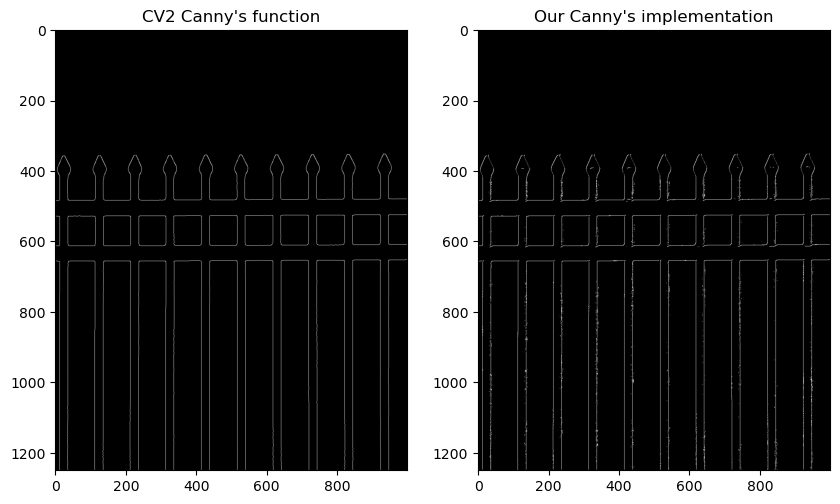

In [14]:
function_result = canny_edge_detection(img, 50, 150, (15, 15), 0)

ig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(edges_detected2, cmap='gray')
axs[0].set_title("CV2 Canny's function")

axs[1].imshow(canny, cmap='gray')
axs[1].set_title("Our Canny's implementation")

plt.show()


In reference to the results of Canny's function in figure the first cells, our implementation shows exact same edge highlight, yet has different white shades on them. We have experimented with different values for the Gaussian kernel size, the results evidently show that 15 was the value close to the optimal, since it allowed having clear highlights of the fence edges with the least noise, hence we considered using it with both (OpenCV Canny's function and ours).

Below you can find function that was implemented in order to count the number of vertical lines in the Canny output image. The algorithm basically takes each "column" in the image that is defined by the width hyper parameter and verifies if the sum of intencities is bigger than the value we define as "min_pixels". If this condition is True - we will save the line and will highlight it even more. To count poles it was only important to add last step, which is diwiding number of lines into 2

In [18]:
def count_posts(edge_image, min_pixels=100, min_col_width=7):
    lines = 0                   #lines is set to 0 to count the number of vertical lines found in the image
    col = 0                     #col is used to iterate over columns of the edge_image
    h = int(len(edge_image[0])) #height of the image
    w = int(len(edge_image[1])) #width of the image

    image_with_lines = edge_image.copy()  

    while col < w:
        col_pixels = int(np.sum(edge_image[:, col]) / 255) #calculates the number of white pixels in the current column
        
        if col_pixels > min_pixels:   
            lines += 1               

            #Draw a thicker line to show the vertical line in the edge image
            col_start = col
            col_end = col + min_col_width
            image_with_lines[500:1250, col_start:col_end] = 255  
            
            col += min_col_width  #By incrementing col by min_col_width, the code skips over the width of the detected line before continuing to search for the next line.
        col += 1
    posts = int(lines/2) 
    return posts, image_with_lines

Number of vertical posts in the image: 10


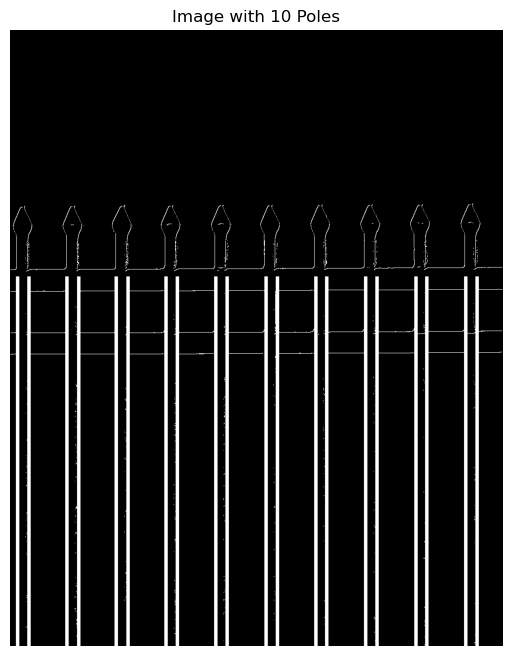

In [19]:
posts_count, image_with_lines = count_posts(canny)

print(f'Number of vertical posts in the image: {posts_count}')

plt.figure(figsize=(8, 8))
plt.imshow(image_with_lines, cmap='gray')
plt.title(f'Image with {posts_count} Poles')
plt.axis('off')
plt.show()